## To implement K-NN (k-nearest neighbors) classifier

* The k-nearest neighbors (KNN) algorithm is a supervised machine learning algorithm that can be used to solve both classification and regression problems.
* The KNN algorithm assumes that similar things exist in close proximity. In other words, similar things are near to each other.
* KNN works by finding the distances between a query and all the examples in the data, selecting the specified number examples (K) closest to the query, then votes for the most frequent label (in the case of classification)
* It is based on instance learning, i.e , the lazy algorithm is not learnt during the training phase but only when they are called for testing

#### 1. Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### 2. The dataset is imported using the pandas library. It is imported in a dataframe from the data.csv file

The dataset that I have selected contains 24 features (or attributes) and 194 rows (or instances). It is composed of biomedical voice measurements from 31 people, out of which 23 have Parkinson's Disease.
* Each column is a particular voice measure
* Each row corresponds to the voice recordings of these individuals
* The aim here is to segregate healthy people from the people having Parkinson's Disease using the 'status' column which is set to '0' for healthy people and '1' for people with Parkinson

In [2]:
dataset = pd.read_csv('data.csv')
dataset=dataset.drop(['name'],axis=1)
x=dataset.iloc[:,:-1].values
y=dataset.loc[:,'status'].values
dataset.columns

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1',
       'spread2', 'D2', 'PPE', 'status'],
      dtype='object')

#### 3. Preprocessing the data using LabelEncoder, OneHotEncoder and MinMaxScaler Scaler before training it

LabelEncoder and OneHotEncoder are parts of the SciKit Learn library in Python, and they are used to convert categorical data, or text data, into numbers, which our predictive models can better understand.

MinMaxScaler scales all features.

This estimator scales and translates each feature individually such that the maximal absolute value of each feature in the training set will be 1.0. It does not shift/center the data, and thus does not destroy any sparsity.

In [3]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler((-1,1))
x=scaler.fit_transform(x)

#### 4. Splitting our dataset into Training set and Test set

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 7)

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

- we can check how our training and testing data look after splitting

In [6]:
x

array([[-0.63138346, -0.77481654, -0.89037042, ...,  0.17153026,
        -0.21867743, -0.0053808 ],
       [-0.6033463 , -0.81013911, -0.4433544 , ...,  0.48267409,
        -0.05370956,  0.34265204],
       [-0.66992292, -0.88174367, -0.46942324, ...,  0.37274182,
        -0.18236124,  0.19336492],
       ...,
       [ 0.00546073, -0.43717403, -0.89854572, ..., -0.31484696,
         0.11793486, -0.63884033],
       [ 0.28578581,  0.20361309, -0.89144127, ..., -0.09423055,
        -0.36355605, -0.67372646],
       [ 0.46654868, -0.35441175, -0.85610326, ..., -0.16981039,
         0.00734563, -0.5690805 ]])

In [7]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [8]:
x_train

array([[-0.16819857,  0.22629182, -0.83791837, ..., -0.34570641,
        -0.09091189, -0.44537292],
       [ 0.7757276 ,  0.08902002,  1.29455556, ..., -0.2861069 ,
         0.06380775, -0.79700594],
       [-0.9990015 , -0.80030161, -0.34048128, ...,  0.96627053,
         0.18057631,  0.05524759],
       ...,
       [-0.40529647, -0.30011056, -1.18795762, ..., -0.23161627,
        -0.14945383,  0.24009742],
       [-1.18719615,  0.19253974, -0.92177382, ...,  0.14072248,
         1.2844657 ,  0.16712639],
       [-0.923594  , -0.84407052, -0.2394943 , ..., -0.32379079,
        -0.96797356, -0.21704176]])

In [9]:
x_test

array([[ 1.33637433e+00,  7.80481192e-01, -6.65468467e-01,
        -9.19486639e-02, -3.84987008e-01,  3.62748953e-02,
        -1.64646798e-01,  3.73358622e-02, -8.02264470e-02,
        -6.54117909e-02,  8.16620576e-02, -7.62944012e-02,
        -2.84372497e-01,  8.16511519e-02, -1.30908407e-01,
        -6.66142665e-01, -6.51438796e-01, -6.83163561e-01,
        -4.30001659e-01, -1.14306017e+00,  1.12407821e+00,
        -3.81473145e-01],
       [-5.98052539e-01,  3.61520562e+00, -6.92990145e-01,
        -5.59775979e-02,  2.09058227e-01, -2.75795895e-01,
        -8.32249231e-02, -2.75903056e-01, -4.75604100e-01,
        -2.81320130e-01, -6.73769701e-01, -5.21719612e-01,
        -3.67897432e-01, -6.73464859e-01,  8.96100700e-03,
         5.97702071e-01, -1.15785632e-01, -6.66674931e-01,
        -4.21806198e-01,  6.54951741e-01,  8.70609267e-01,
        -5.59939501e-01],
       [ 2.35391207e-01,  1.27999359e-01, -9.48227563e-01,
         2.84689557e-01,  2.09058227e-01,  2.06180103e-01,
    

In [10]:
y_train

array([1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0], dtype=int64)

In [11]:
y_test

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1], dtype=int64)

#### 5. Import KNN model

* Create a KNN classifier 
* Train the model using the training sets

Using metric : "euclidean", neighbors (k) = 3

In [12]:
from sklearn.neighbors import KNeighborsClassifier
#Create a KNN classifier
e_clf = KNeighborsClassifier(n_neighbors = 3 ,metric = 'euclidean',p=3)
#Train the model using the training sets
e_clf.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=3,
                     weights='uniform')

Using metric : 'manhattan' , neighbors (k) = 5

In [13]:
from sklearn.neighbors import KNeighborsClassifier
#Create a KNN classifier
m_clf = KNeighborsClassifier(n_neighbors = 5 ,metric = 'manhattan',p=2)
#Train the model using the training sets
m_clf.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

Using metric : "minkowski", neighnors (k) = 7

In [14]:
from sklearn.neighbors import KNeighborsClassifier
#Create a KNN classifier
min_clf = KNeighborsClassifier(n_neighbors = 7, metric = 'minkowski',p=2)
#Train the model using the training sets
min_clf.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

#### 6. Predict the output using the .predict() method provided by sklearn

In [15]:
e_preds=e_clf.predict(x_test)
e_preds

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [16]:
m_preds=m_clf.predict(x_test)
m_preds

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [17]:
min_preds=min_clf.predict(x_test)
min_preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

#### 7. Import classification report, accuracy score and confusion matrix to view the results

In [18]:
#making the confusion matrix
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,plot_confusion_matrix

* Print the <b>confusion matrix</b>

In [19]:
cm = confusion_matrix(y_test,e_preds)
print(cm)

[[ 5  2]
 [ 0 32]]


Confusion matrix, without normalization
[[ 5  2]
 [ 0 32]]
Normalized confusion matrix
[[0.71428571 0.28571429]
 [0.         1.        ]]


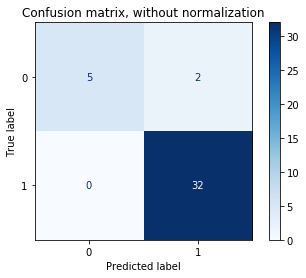

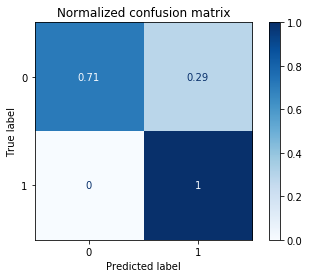

In [20]:
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(e_clf, x_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [21]:
cm = confusion_matrix(y_test,m_preds)
print(cm)

[[ 5  2]
 [ 0 32]]


In [22]:
cm = confusion_matrix(y_test,min_preds)
print(cm)

[[ 4  3]
 [ 1 31]]


* Print the <b>classification report</b>

In [23]:
print(classification_report(y_test,e_preds))

              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        32

    accuracy                           0.95        39
   macro avg       0.97      0.86      0.90        39
weighted avg       0.95      0.95      0.95        39



In [24]:
print(classification_report(y_test,m_preds))

              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        32

    accuracy                           0.95        39
   macro avg       0.97      0.86      0.90        39
weighted avg       0.95      0.95      0.95        39



In [25]:
print(classification_report(y_test,min_preds))

              precision    recall  f1-score   support

           0       0.80      0.57      0.67         7
           1       0.91      0.97      0.94        32

    accuracy                           0.90        39
   macro avg       0.86      0.77      0.80        39
weighted avg       0.89      0.90      0.89        39



* Print the <b>accuracy</b>

In [26]:
print('Accuracy using Eucledian distance and k = 3:',accuracy_score(y_test.tolist(), e_preds.tolist())*100)

Accuracy using Eucledian distance and k = 3: 94.87179487179486


In [27]:
print('Accuracy using Manhattan distance and k = 5:',accuracy_score(y_test.tolist(), m_preds.tolist())*100)

Accuracy using Manhattan distance and k = 5: 94.87179487179486


In [28]:
print('Accuracy using Minowski distance and k  = 7:',accuracy_score(y_test.tolist(), min_preds.tolist())*100)

Accuracy using Minowski distance and k  = 7: 89.74358974358975


Therefore, it can be concluded that preprocessing the data using the MinMaxScaler for data preprocessing improves accuracy by high rates. Using Eucledian and Manhattan distances as metrics in the classifier with neighbors equal to 3 and 5 respectively produce a high accuracy of 94.87% 